<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

## Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

In [94]:
import pandas as pd
import numpy as np

In [95]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [96]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [97]:
pop

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

#### Accesing one column

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [98]:
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [99]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [100]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Note that you can extract a row using row name directly. The following will not work. [`each column is a pandas series`]


In [7]:
'''
data['Texas']
'''

"\ndata['Texas']\n"

#### Array-style indexing using  ``loc``, ``iloc``

`iloc` indexer can be used to extract from DataFrame using row or column `index numbers` like in numpy array

In [101]:
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [103]:
data.iloc[0:2, :]

,area,pop
California,423967,38332521
Texas,695662,26448193


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [105]:
data.loc['Texas':'Florida', ['area','pop']]

,area,pop
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [106]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### Boolean indexing

For example, in the ``loc`` indexer we can combine boolean indexing as in the following:

First lets add another column to the data frame

In [109]:
data['density'] = data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Extracting rows based on a boolean condition on one column

In [110]:
data.loc[data['pop'] > 20000000 ,:]

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740


Extracting rows based on a boolean condition on one column. But, retain only two columns.

In [111]:
data.loc[data['pop'] > 20000000 ,['area','pop']]

,area,pop
California,423967,38332521
Texas,695662,26448193


What does the following code do ?

In [112]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [15]:
data.loc['Florida',:]>200

area        True
pop         True
density    False
Name: Florida, dtype: bool

**What does the following code do ?**

In [113]:
data.loc[:,data.loc['Florida',:]>200]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### Modifying contents of data frame 

Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [116]:
data1=data.copy()
data1.iloc[0, 2] = 90 # modify first row, third column
data1

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [117]:
data1.loc['California','density'] = 100 #  modify 'california' row and 'density' column
data1

,area,pop,density
California,423967,38332521,100.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [118]:
data1['density']>50

California     True
Texas         False
New York       True
Florida        True
Illinois       True
Name: density, dtype: bool

What does the following code do ?

In [119]:
data1.loc[data1['density']>50,'density'] = 100
data1

,area,pop,density
California,423967,38332521,100.00000
Texas,695662,26448193,38.01874
New York,141297,19651127,100.00000
Florida,170312,19552860,100.00000
Illinois,149995,12882135,100.00000


What does the following code do ?

In [120]:
data2=data1.copy()
data2.loc[data1['density']>50,['pop','area']] = 0
data2

,area,pop,density
California,0,0,100.00000
Texas,695662,26448193,38.01874
New York,0,0,100.00000
Florida,0,0,100.00000
Illinois,0,0,100.00000


#### sort rows based on one column

In [121]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [122]:
data.sort_values(by=['area'])

,area,pop,density
New York,141297,19651127,139.076746
Illinois,149995,12882135,85.883763
Florida,170312,19552860,114.806121
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740


#### Removing and adding new columns

In [123]:
data1 = data.copy()
data1

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Add new columns to the data frame

In [125]:
data1['group'] = [1,2,3,4,5]
data1['group1'] = np.array([1,2,3,4,5])
data1['group2'] = 0
data1

,area,pop,density,group,group1,group2
California,423967,38332521,90.413926,1,1,0
Texas,695662,26448193,38.018740,2,2,0
New York,141297,19651127,139.076746,3,3,0
Florida,170312,19552860,114.806121,4,4,0
Illinois,149995,12882135,85.883763,5,5,0


Drop columns from the data frame using `drop`

In [126]:
data1 = data1.drop(columns=['group1','group2'])
data1

,area,pop,density,group
California,423967,38332521,90.413926,1
Texas,695662,26448193,38.018740,2
New York,141297,19651127,139.076746,3
Florida,170312,19552860,114.806121,4
Illinois,149995,12882135,85.883763,5


#### Combining two data frames using `concat`

Create a data frame with row and column names

In [127]:
import pandas as pd
import numpy as np
rows=['row'+str(i) for i in range(0,4)]
cols=['col'+str(i) for i in range(0,3)]
df1 = pd.DataFrame(np.random.randint(5, size=(4, 3)),index=rows,columns=cols)
df1

,col0,col1,col2
row0,1,3,4
row1,1,3,4
row2,4,1,1
row3,0,1,4


Create a data frame with default row and column names

In [128]:
df2 = pd.DataFrame(np.random.randint(5, size=(4, 3)))
df2

,0,1,2
0,2,3,2
1,0,1,4
2,2,2,1
3,1,3,1


When the row names don't match, extra rows and extra columns are added with missing values (`NaN`)

In [131]:
df3 = pd.concat([df1,df2],axis=0)
df3

,col0,col1,col2,0,1,2
row0,1.0,3.0,4.0,NaN,NaN,NaN
row1,1.0,3.0,4.0,NaN,NaN,NaN
row2,4.0,1.0,1.0,NaN,NaN,NaN
row3,0.0,1.0,4.0,NaN,NaN,NaN
0,NaN,NaN,NaN,2.0,3.0,2.0
1,NaN,NaN,NaN,0.0,1.0,4.0
2,NaN,NaN,NaN,2.0,2.0,1.0
3,NaN,NaN,NaN,1.0,3.0,1.0


In [132]:
df3 = pd.concat([df1,df2],axis=1)
df3

,col0,col1,col2,0,1,2
row0,1.0,3.0,4.0,NaN,NaN,NaN
row1,1.0,3.0,4.0,NaN,NaN,NaN
row2,4.0,1.0,1.0,NaN,NaN,NaN
row3,0.0,1.0,4.0,NaN,NaN,NaN
0,NaN,NaN,NaN,2.0,3.0,2.0
1,NaN,NaN,NaN,0.0,1.0,4.0
2,NaN,NaN,NaN,2.0,2.0,1.0
3,NaN,NaN,NaN,1.0,3.0,1.0


In [133]:
import pandas as pd
import numpy as np
rows=['row'+str(i) for i in range(0,4)]
cols=['col'+str(i) for i in range(0,3)]
df10 = pd.DataFrame(np.random.randint(5, size=(4, 3)),index=rows,columns=cols)
df10

,col0,col1,col2
row0,4,3,1
row1,4,0,0
row2,4,1,1
row3,3,3,2


In [134]:
import pandas as pd
import numpy as np
rows=['row'+str(i) for i in range(0,4)]
cols=['col'+str(i) for i in range(0,3)]
df11 = pd.DataFrame(np.random.randint(5, size=(4, 3)),index=rows,columns=cols)
df11

,col0,col1,col2
row0,4,2,0
row1,0,3,4
row2,4,1,0
row3,3,2,0


In [135]:
dfcolumn = pd.concat([df10,df11],axis=0)
dfcolumn

,col0,col1,col2
row0,4,3,1
row1,4,0,0
row2,4,1,1
row3,3,3,2
row0,4,2,0
row1,0,3,4
row2,4,1,0
row3,3,2,0


In [136]:
dfrow = pd.concat([df10,df11],axis=1)
dfrow

,col0,col1,col2,col0,col1,col2
row0,4,3,1,4,2,0
row1,4,0,0,0,3,4
row2,4,1,1,4,1,0
row3,3,3,2,3,2,0


You can replace all `NaN` (missing values)

In [137]:
df3

,col0,col1,col2,0,1,2
row0,1.0,3.0,4.0,NaN,NaN,NaN
row1,1.0,3.0,4.0,NaN,NaN,NaN
row2,4.0,1.0,1.0,NaN,NaN,NaN
row3,0.0,1.0,4.0,NaN,NaN,NaN
0,NaN,NaN,NaN,2.0,3.0,2.0
1,NaN,NaN,NaN,0.0,1.0,4.0
2,NaN,NaN,NaN,2.0,2.0,1.0
3,NaN,NaN,NaN,1.0,3.0,1.0


In [138]:
df4=df3.fillna(0)
df4

,col0,col1,col2,0,1,2
row0,1.0,3.0,4.0,0.0,0.0,0.0
row1,1.0,3.0,4.0,0.0,0.0,0.0
row2,4.0,1.0,1.0,0.0,0.0,0.0
row3,0.0,1.0,4.0,0.0,0.0,0.0
0,0.0,0.0,0.0,2.0,3.0,2.0
1,0.0,0.0,0.0,0.0,1.0,4.0
2,0.0,0.0,0.0,2.0,2.0,1.0
3,0.0,0.0,0.0,1.0,3.0,1.0


You can also remove rows containing any `NaN` (missing values)

In [139]:
df4=df3.dropna()
df4

,col0,col1,col2,0,1,2


If you concatenate dataframes (along axis =1) with same row names but different column names, extra columns are aded.

In [140]:
df2 = pd.DataFrame(np.random.randint(5, size=(4, 3)),index=rows)
df2

,0,1,2
row0,2,1,4
row1,1,2,3
row2,4,0,4
row3,2,2,3


In [141]:
df3=pd.concat([df1,df2],axis=1)
df3

,col0,col1,col2,0,1,2
row0,1,3,4,2,1,4
row1,1,3,4,1,2,3
row2,4,1,1,4,0,4
row3,0,1,4,2,2,3


If you concatenate dataframes (along axis =0) with same column names but different row names, extra rows are aded.

In [142]:
df2 = pd.DataFrame(np.random.randint(5, size=(4, 3)),columns=cols)
df2

,col0,col1,col2
0,4,3,4
1,4,3,2
2,2,4,0
3,1,2,1


In [143]:
df1

,col0,col1,col2
row0,1,3,4
row1,1,3,4
row2,4,1,1
row3,0,1,4


In [144]:
df3=pd.concat([df1,df2],axis=0)
df3

,col0,col1,col2
row0,1,3,4
row1,1,3,4
row2,4,1,1
row3,0,1,4
0,4,3,4
1,4,3,2
2,2,4,0
3,1,2,1


If you concatenate dataframes (along axis =0 or 1) with same row and column names, extra rows or columns will be added with duplicated row or column names

In [145]:
df2 = pd.DataFrame(np.random.randint(5, size=(4, 3)),index=rows,columns=cols)
df2

,col0,col1,col2
row0,2,4,3
row1,3,0,2
row2,3,2,2
row3,0,2,3


In [146]:
df1

,col0,col1,col2
row0,1,3,4
row1,1,3,4
row2,4,1,1
row3,0,1,4


In [147]:
pd.concat([df1,df2])

,col0,col1,col2
row0,1,3,4
row1,1,3,4
row2,4,1,1
row3,0,1,4
row0,2,4,3
row1,3,0,2
row2,3,2,2
row3,0,2,3


In [148]:
pd.concat([df1,df2], axis =0)

,col0,col1,col2
row0,1,3,4
row1,1,3,4
row2,4,1,1
row3,0,1,4
row0,2,4,3
row1,3,0,2
row2,3,2,2
row3,0,2,3


In [149]:
pd.concat([df1,df2], axis =1)

,col0,col1,col2,col0,col1,col2
row0,1,3,4,2,4,3
row1,1,3,4,3,0,2
row2,4,1,1,3,2,2
row3,0,1,4,0,2,3


It will not be covered in this notebook, but look at `merge` function under Pandas. It is also another
method to combine data frames.

In [151]:
# importing the module
import pandas as pd
  
# creating the first DataFrame
df1 = pd.DataFrame({"fruit" : ["apple", "banana", "avocado"],
                    "market_price" : [21, 14, 35]})
display("The first DataFrame")
display(df1)
  
# creating the second DataFrame
df2 = pd.DataFrame({"fruit" : ["banana", "apple", "avocado"],
                    "wholesaler_price" : [65, 68, 75]})
display("The second DataFrame")
display(df2)
  
# joining the DataFrames
display("The merged DataFrame")
pd.merge(df1, df2, on = "fruit", how = "inner")

'The first DataFrame'

,fruit,market_price
0,apple,21
1,banana,14
2,avocado,35


'The second DataFrame'

,fruit,wholesaler_price
0,banana,65
1,apple,68
2,avocado,75


'The merged DataFrame'

,fruit,market_price,wholesaler_price
0,apple,21,68
1,banana,14,65
2,avocado,35,75


**for more practice with the merge use this link https://www.geeksforgeeks.org/joining-two-pandas-dataframes-using-merge/ its easy isn't it**

#### Transpose of data frame

In [152]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [153]:
data1 = data.T
data1

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


You can display up to some significant digits.

In [154]:
data1.round(2)

,California,Texas,New York,Florida,Illinois
area,423967.00,695662.00,141297.00,170312.00,149995.00
pop,38332521.00,26448193.00,19651127.00,19552860.00,12882135.00
density,90.41,38.02,139.08,114.81,85.88


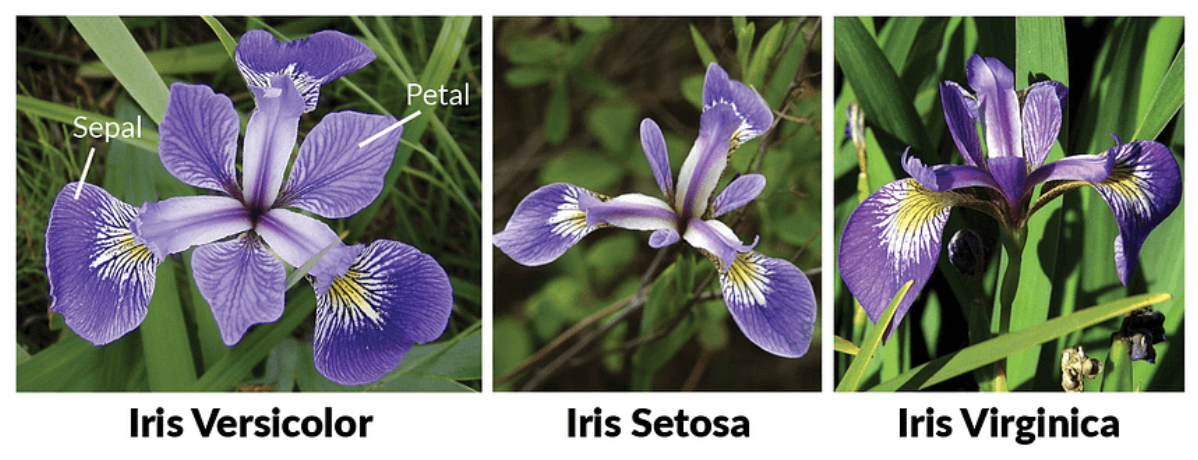

In [155]:
from IPython.display import Image
Image(filename='Irish.PNG') 

#### Aregation and Grouping

- `aggregation`: computing simple statistics: `sum`, `mean` etc.
- `Grouping`: assign a group number to the rows of the data frame. It gives a `grouped' data frame.

In [156]:
pwd

'/homes/t326h379'

In [157]:
iris= pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [159]:
iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

**Drop duplicate values**

In [160]:
data = iris.drop_duplicates(subset ="variety",)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


- `groupby` creates a group data frame where each row in the data frame is assigned a group based on the value in a column or columns ( example : `variety` column)
- The aggregate function is applied to each group.

In [161]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [162]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
iris.groupby('variety').describe()

sepal.length                                              \
                  count   mean       std  min    25%  50%  75%  max   
variety                                                               
Setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal.width         ... petal.length      petal.width         \
                 count   mean  ...          75%  max       count   mean   
variety                        ...                                        
Setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
Versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
variety                                        
Setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
Versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [63]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [64]:
type(planets)

pandas.core.frame.DataFrame

In [66]:
planets.to_csv('lets_look_the_data.csv')  

In [67]:
pwd

'/homes/t326h379'

In [68]:
planets.groupby('method').size()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
dtype: int64

In [69]:
dropna_lets_savethecsvfile = planets.dropna()

In [70]:
dropna_lets_savethecsvfile.to_csv('dropna_lets_savethecsvfile.csv')  

You can also group based on multiple columns and then aggregate.

In [71]:
planets.dropna().groupby(['method','year']).mean()

number  orbital_period       mass    distance
method          year                                                 
Radial Velocity 1989  1.000000       83.888000  11.680000   40.570000
                1995  1.000000        4.230785   0.472000   15.360000
                1996  3.250000      275.145383   1.979400   13.920000
                1997  1.000000       39.845000   1.040000   17.430000
                1998  2.200000      114.310661   2.687120   26.302000
                1999  1.642857      591.477789   3.236643   29.795000
                2000  1.571429      572.027671   3.633014   28.340000
                2001  1.272727      792.019727   3.430909   37.212727
                2002  1.451613     1003.144581   3.937290   44.396129
                2003  1.363636      789.289313   3.660955   44.505909
                2004  1.800000      787.419733   1.454267   42.712000
                2005  1.735294      620.300633   2.003897   46.361471
                2006  1.450000      785.564764   1.799800   44.394500
                2007  1.444444      478.827107   2.797667   62.292593
                2008  1.767442      741.466230   3.424339   56.967674
                2009  1.400000     1381.749559   3.166771   59.569143
                2010  2.195122      819.593669   1.289610   49.539268
                2011  1.844444      603.793312   1.212407   59.772889
                2012  2.217391     1965.938509   3.635057   64.977826
                2013  2.285714      370.173204   2.073464   54.013929
                2014  1.500000     3639.500000   1.530000   44.510000
Transit         2013  1.000000        2.703390   1.470000  178.000000

You can use the `aggregate` to apply multiple aggregate functions.

In [72]:
iris.groupby('variety').aggregate(['min','max'])

sepal.length      sepal.width      petal.length      petal.width  \
                    min  max         min  max          min  max         min   
variety                                                                       
Setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
Versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
Virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                 
            max  
variety          
Setosa      0.6  
Versicolor  1.8  
Virginica   2.5

In [73]:
iris.groupby('variety')['sepal.length'].aggregate(['min','max','sum'])

,min,max,sum
variety,,,
Setosa,4.3,5.8,250.3
Versicolor,4.9,7.0,296.8
Virginica,4.9,7.9,329.4


# Exercise Questions

In [74]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


- In text1, text2, and text3, find out the frequency of words of length 4, 5, and 6.
- Store the results in a pandas data frame where rows represent the text and columns represent the word length.

First write a function that extracts the frequency of words of length 4,5,6 from a text and returns in a series.

Then apply the function to text1, text2, and text3 to get three series objects. use the three series objects to get the desired data frame.

In [75]:
# add code to the following function

'''
import nltk
def getSeries(text):
  l=[len(w) for w in text1 if len(w) > 3 and len(w) < 7 ]
  x = FreqDist(l).most_common()
'''


'\nimport nltk\ndef getSeries(text):\n  l=[len(w) for w in text1 if len(w) > 3 and len(w) < 7 ]\n  x = FreqDist(l).most_common()\n'

# Quiz 1

**Question 1**

In [76]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

In [77]:
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [78]:
# print(arr[1, 1:4]) 

**Question 2**

In [79]:
df = pd.DataFrame({

    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],

    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],

    'rating': [4, 4, 3.5, 15, 5]

})

In [80]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [81]:
df1 = df.drop_duplicates()

In [82]:
# df1

In [83]:
df2 = df.drop_duplicates(subset=['brand'])

In [84]:
# df2

**Question 3**

In [85]:
import pandas as pd
technologies = {
     'Courses':["Spark","PySpark","Hadoop","Python","pandas"],
     'Fee' :[24000,25000,25000,24000,24000],
     'Duration':['30day','50days','55days', '40days','60days'],
     'Discount':[1000,2300,1000,1200,2500]
          }
index_labels=['r1','r2','r3','r4','r5']
df = pd.DataFrame(technologies, index=index_labels)
print(df)

    Courses    Fee Duration  Discount
r1    Spark  24000    30day      1000
r2  PySpark  25000   50days      2300
r3   Hadoop  25000   55days      1000
r4   Python  24000   40days      1200
r5   pandas  24000   60days      2500


In [86]:
# print(df.loc['r4']['Duration'])
# print(df.loc['r4','Duration'])
# print(df.loc['r4'][2])

In [87]:
# print(df.iloc['r4']['Duration'])
# print(df.iloc['r4','Duration'])
# print(df.iloc['r4'][2])

**Question 4**

**NumPy Arrays are faster than Python Lists because of the following reasons:**
    
**An array is a collection of homogeneous data-types that are stored in contiguous memory locations. On the other hand, a list in Python is a collection of heterogeneous data types stored in non-contiguous memory locations.**


**The NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly.**
**The NumPy package integrates C, C++, and Fortran codes in Python. These programming languages have very little execution time compared to Python.**

**Question 5**

In [88]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),

                  columns=['A', 'B', 'C', 'D'])

In [89]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [90]:
# df.drop(['B', 'C'], axis=1, inplace=False)

In [91]:
# df

In [92]:
# df.drop(['B', 'C'], axis=1, inplace=True)

In [93]:
# df